In [1]:
using LazySets

┌ Info: Precompiling LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1260


In [2]:
Z0 = Zonotope([1., 2], [[.5, .5], [0, .5], [.5, 0]])

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.0, 2.0], [0.5 0.0 0.5; 0.5 0.5 0.0])

In [3]:
using Plots

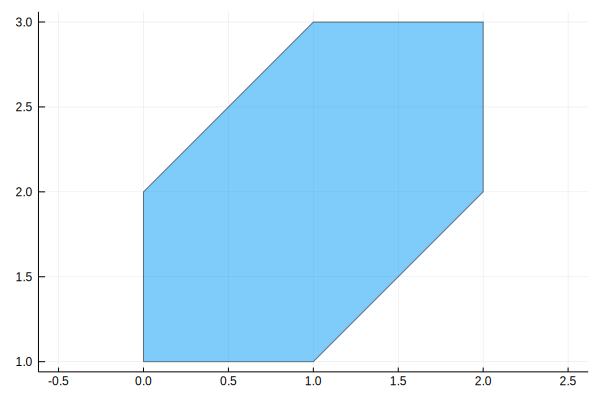

In [4]:
plot(Z0, ratio=1)

In [5]:
Z1 = linear_map([2. -1; 0 1], Z0)

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.0, 2.0], [0.5 -0.5 1.0; 0.5 0.5 0.0])

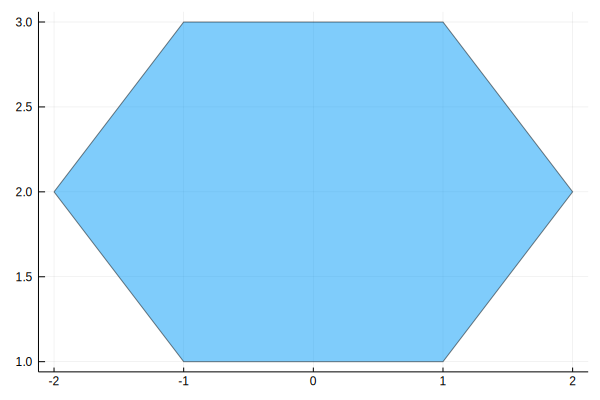

In [6]:
plot(Z1)

In [7]:
P = convert(HPolytope, Z1)

HPolytope{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([0.7071067811865475, -0.7071067811865475], 0.0), HalfSpace{Float64,Array{Float64,1}}([-0.7071067811865475, 0.7071067811865475], 2.82842712474619), HalfSpace{Float64,Array{Float64,1}}([0.7071067811865475, 0.7071067811865475], 2.82842712474619), HalfSpace{Float64,Array{Float64,1}}([-0.7071067811865475, -0.7071067811865475], 0.0), HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], -1.0), HalfSpace{Float64,Array{Float64,1}}([-0.0, 1.0], 3.0)])

In [8]:
A2 = intersection(P, HalfSpace([-1., 0], 0.))

HPolytope{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([0.7071067811865475, -0.7071067811865475], 0.0), HalfSpace{Float64,Array{Float64,1}}([0.7071067811865475, 0.7071067811865475], 2.82842712474619), HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], -1.0), HalfSpace{Float64,Array{Float64,1}}([-0.0, 1.0], 3.0), HalfSpace{Float64,Array{Float64,1}}([-1.0, 0.0], 0.0)])

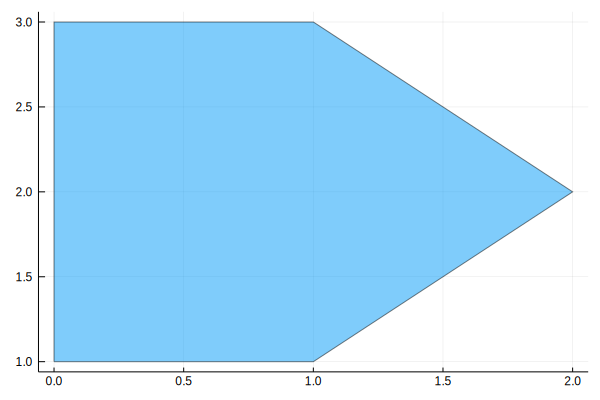

In [9]:
plot(A2)

In [21]:
Z2 = overapproximate(A2, Zonotope, CustomDirections([[1., 0], [1, 1], [1, -1]]))

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.4999999999999999, 2.0], [0.5000000000000001 0.4999999999999999 0.5; 0.0 0.4999999999999999 -0.5])

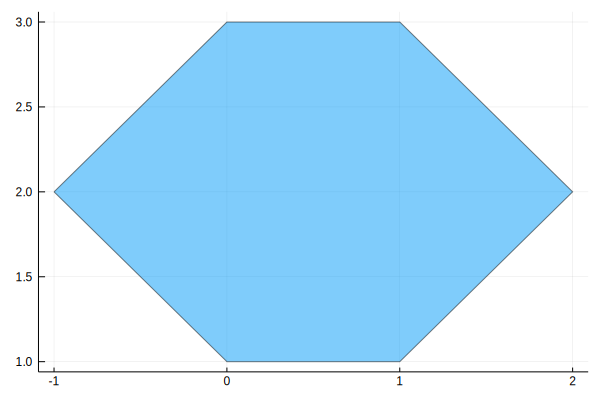

In [22]:
plot(Z2)

In [27]:
Z4 = linear_map([1. 0; 0 1], Z2)

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.4999999999999999, 2.0], [0.5000000000000001 0.4999999999999999 0.5; 0.0 0.4999999999999999 -0.5])

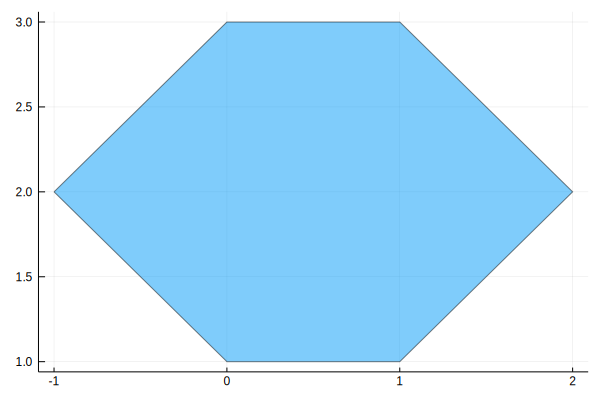

In [28]:
plot(Z4)

In [23]:
A3 = intersection(P, HalfSpace([1., 0], 0.))

HPolytope{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([-0.7071067811865475, 0.7071067811865475], 2.82842712474619), HalfSpace{Float64,Array{Float64,1}}([-0.7071067811865475, -0.7071067811865475], 0.0), HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], -1.0), HalfSpace{Float64,Array{Float64,1}}([-0.0, 1.0], 3.0), HalfSpace{Float64,Array{Float64,1}}([1.0, 0.0], 0.0)])

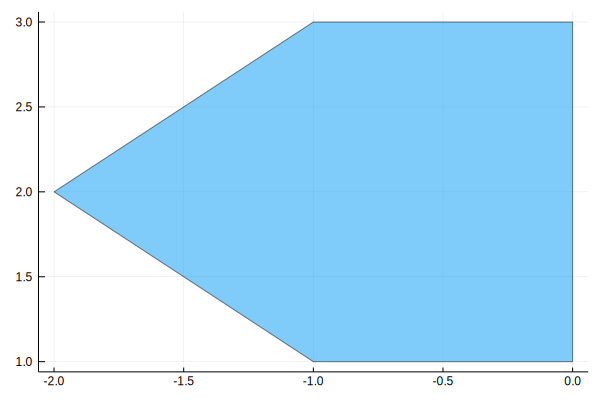

In [24]:
plot(A3)

In [55]:
Z3 = overapproximate(A3, Zonotope, CustomDirections([[-1., 0], [-1, 1], [-1, -1]]))

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([-0.4999999999999999, 2.0], [-0.5 -0.4999999999999999 -0.5; 0.0 0.4999999999999999 -0.5])

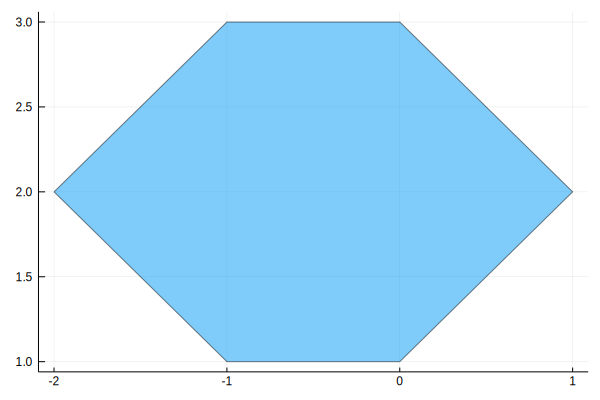

In [56]:
plot(Z3)

In [29]:
Z5 = linear_map([0. 0; 0 1], Z3)

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.0, 2.0], [0.0 0.0 0.0; 0.0 0.4999999999999999 -0.5])

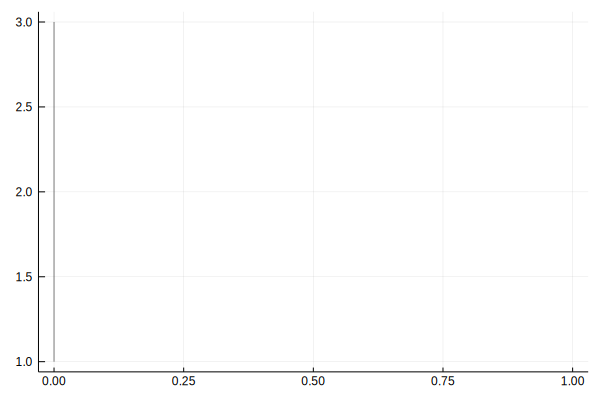

In [30]:
plot(Z5)

In [33]:
CH6 = convex_hull(Z4, Z5)

VPolygon{Float64,Array{Float64,1}}([[-1.0, 2.0], [-1.1102230246251565e-16, 1.0], [1.0, 1.0], [2.0, 2.0], [0.9999999999999999, 3.0], [-3.3306690738754696e-16, 3.0]])

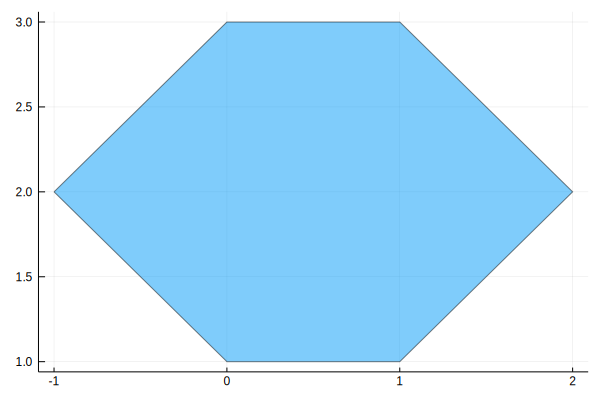

In [34]:
plot(CH6)

In [37]:
overapproximate(CH6, Zonotope, CustomDirections([[-1., 0], [-1, 1], [-1, -1]]))

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.4999999999999998, 2.0], [-0.5000000000000001 -0.5 -0.4999999999999999; 0.0 0.5 -0.4999999999999999])

In [57]:
Z0 = Zonotope([1., 2], [[.5, .5], [0, .5], [.5, 0]]) # Initial Zonotope
Z1 =linear_map([2. -1; 0 1], Z0)
P = convert(HPolytope, Z1) # convertion to polytope for intersections

A2 = intersection(P, HalfSpace([-1., 0], 0.)) # x1 >= 0
A3 = intersection(P, HalfSpace([1., 0], 0.)) # x1 < 0
    
cd = CustomDirections([[-1., 0], [-1, 1], [1, 1]]) # directions of the generators
    
Z2 = overapproximate(A2, Zonotope, cd) # overapproximate intersection with zonotope
Z3 = overapproximate(A3, Zonotope, cd)

Z4 = linear_map([1. 0; 0 1], Z2) # Z2 * (1 0; 0 1)
Z5 = linear_map([0. 0; 0 1], Z3) # Z3 * (0 0; 0 1)
    
CH6 = convex_hull(Z4, Z5) # union of Z4 and Z5

Z6 = overapproximate(CH6, Zonotope, cd) # overapproximate the union with a zonotope

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.4999999999999998, 2.0], [-0.5000000000000001 -0.5 0.4999999999999999; 0.0 0.5 0.4999999999999999])